In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [29]:
df=pd.read_csv("customer_purchase_intention.csv")
df.drop(columns="CustomerID",inplace=True)
df

,Age,Gender,DeviceType,TimeOnSite,PageViews,AdClicks,SessionDuration,Country,ReturningVisitor,Purchase
0,56,Female,Desktop,11.72,3,0,30.87,Germany,0,0
1,69,Female,Mobile,4.64,5,1,21.67,Germany,0,0
2,46,Female,Desktop,5.02,13,5,54.86,UK,1,1
3,32,Female,Mobile,10.21,15,9,21.05,India,0,0
4,60,Male,Desktop,15.33,14,4,27.88,UK,1,1
...,...,...,...,...,...,...,...,...,...,...
795,68,Female,Mobile,1.06,18,1,41.95,Germany,0,1
796,22,Male,Mobile,13.16,10,5,11.78,UK,1,1
797,64,Male,Desktop,6.67,9,6,19.82,India,0,1
798,42,Male,Mobile,5.57,8,4,25.52,Canada,0,0


In [30]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,Age,Gender,DeviceType,TimeOnSite,PageViews,AdClicks,SessionDuration,Country,ReturningVisitor,Purchase
0,56,0,0,11.72,3,0,30.87,1,0,0
1,69,0,1,4.64,5,1,21.67,1,0,0
2,46,0,0,5.02,13,5,54.86,3,1,1
3,32,0,1,10.21,15,9,21.05,2,0,0
4,60,1,0,15.33,14,4,27.88,3,1,1
...,...,...,...,...,...,...,...,...,...,...
795,68,0,1,1.06,18,1,41.95,1,0,1
796,22,1,1,13.16,10,5,11.78,3,1,1
797,64,1,0,6.67,9,6,19.82,2,0,1
798,42,1,1,5.57,8,4,25.52,0,0,0


In [31]:
X=df[["Age","Country"]].values
y=df["Purchase"].values

In [32]:
scalar=StandardScaler()
scu=scalar.fit_transform(X)
scu

array([[ 0.80839757, -0.73890425],
       [ 1.6835235 , -0.73890425],
       [ 0.13522378,  0.71170532],
       ...,
       [ 1.34693661, -0.01359946],
       [-0.13404573, -1.46420904],
       [-1.68234545, -0.73890425]], shape=(800, 2))

In [33]:
x_train,x_test,y_train,y_test=train_test_split(scu,y,test_size=0.2,random_state=42)

accuracy score of linear:68.12%


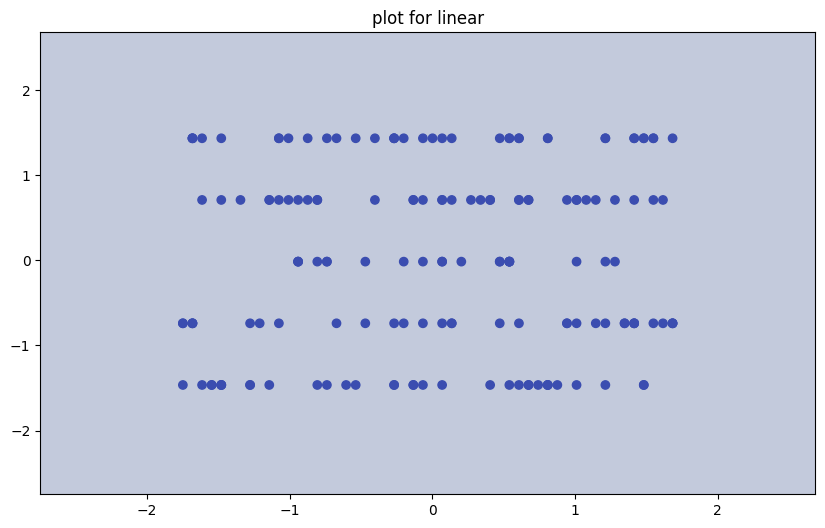

accuracy score of poly:68.12%


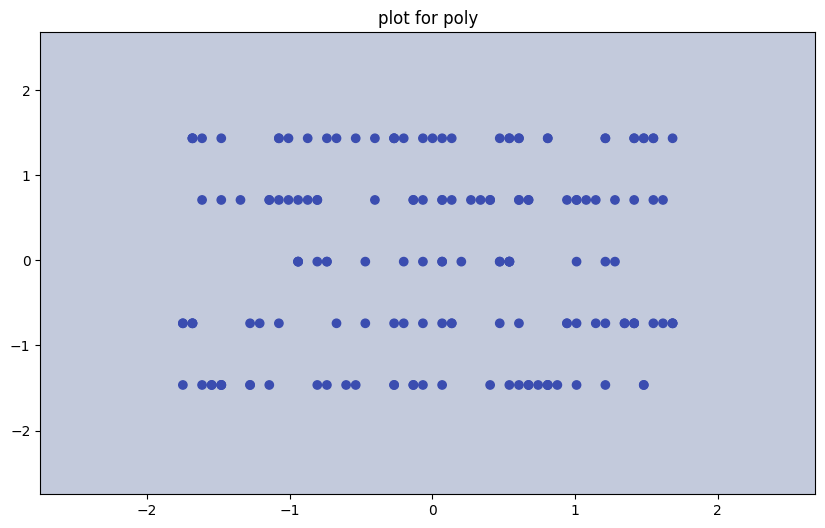

accuracy score of rbf:68.12%


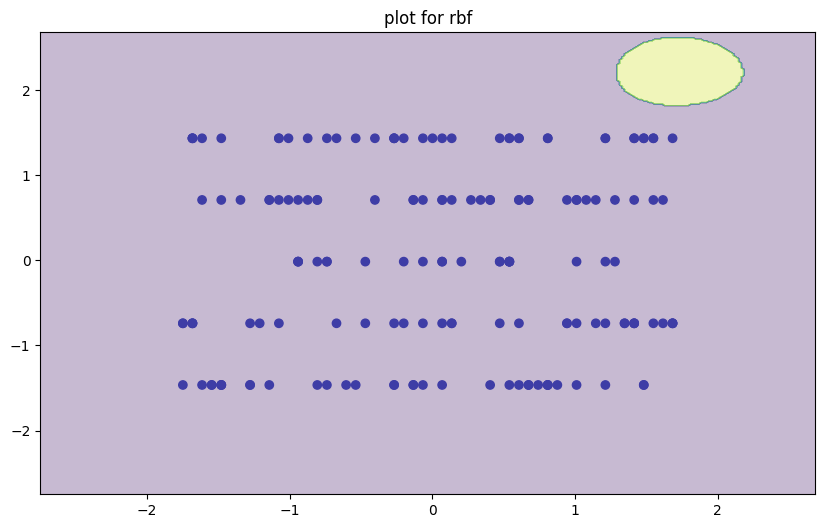

accuracy score of sigmoid:57.50%


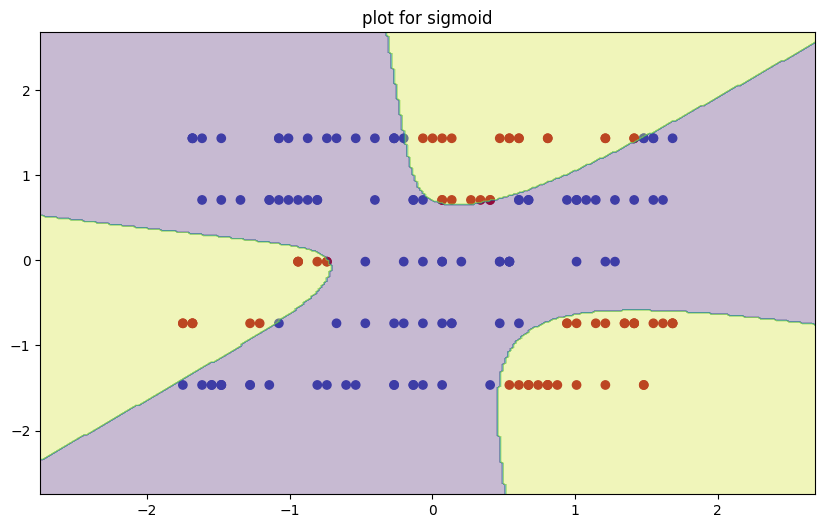

In [34]:
kernal=["linear","poly","rbf","sigmoid"]
for i in kernal:
    svm=SVC(kernel=i,degree=3,gamma="auto")
    svm.fit(x_train,y_train)
    y_pred=svm.predict(x_test)
    y_pred
    acc=accuracy_score(y_test,y_pred)
    print(f"accuracy score of {i}:{acc*100:.2f}%")

    plt.figure(figsize=[10,6])
    plt.scatter(x_test[:, 0],x_test[:, 1],c=y_pred,cmap="coolwarm")
    x_min,x_max=x_test[:, 0].min()-1 ,x_test[:, 0].max()+1
    y_min,y_max=x_test[:, 1].min()-1 ,x_test[:, 1].max()+1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,300),np.linspace(x_min,x_max,300))
    z=svm.predict(np.c_[xx.ravel(),yy.ravel()])
    plt.contourf(xx,yy,z.reshape(xx.shape),alpha=0.3)
    plt.title(f"plot for {i}")
    plt.show()

In [35]:
new=np.array([[32.980285,19912.928365]])
scu=scalar.transform(new)
a=svm.predict(scu)
a

array([1])